In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
! pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [4]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Input
from tensorflow.keras.metrics import Precision, Recall, F1Score

In [5]:
tr_data = pd.read_csv("train.csv")
ts_data = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission.csv")

In [6]:
tr_data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [7]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [8]:
tr_data.shape

(140700, 20)

In [9]:
ts_data.shape

(93800, 19)

In [10]:
tr_data.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,36630
Academic Pressure,112803
Work Pressure,27918
CGPA,112802


# **Data Cleaning and EDA**

In [11]:
(2/140700)*100

0.0014214641080312722

In [12]:
# Dropping negligible missing values from columns Degree,Financial Stress and Dietary Habits
tr_data[tr_data['Degree'].isnull()]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
110064,110064,Riya,Female,28.0,Srinagar,Working Professional,NaN,NaN,3.0,NaN,NaN,3.0,5-6 hours,Unhealthy,NaN,Yes,4.0,2.0,Yes,1
128934,128934,Anaya,Female,28.0,Srinagar,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Unhealthy,NaN,Yes,3.0,3.0,Yes,0


In [13]:
tr_data.dropna(subset=['Degree','Financial Stress','Dietary Habits'],inplace=True)

In [14]:
tr_data.shape

(140690, 20)

In [15]:
tr_data[(tr_data['Profession'].isnull()) & (tr_data['Working Professional or Student']!='Student')]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
29,29,Kashish,Female,19.0,Agra,Working Professional,NaN,NaN,1.0,NaN,NaN,5.0,More than 8 hours,Healthy,Class 12,No,5.0,2.0,No,0
36,36,Anvi,Female,50.0,Kalyan,Working Professional,NaN,NaN,4.0,NaN,NaN,4.0,7-8 hours,Unhealthy,Class 12,No,0.0,2.0,No,0
43,43,Vidya,Female,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,Yes,10.0,5.0,No,1
48,48,Anand,Male,38.0,Ghaziabad,Working Professional,NaN,NaN,2.0,NaN,NaN,5.0,5-6 hours,Moderate,Class 12,No,1.0,1.0,Yes,0
50,50,Raunak,Male,21.0,Pune,Working Professional,NaN,NaN,4.0,NaN,NaN,5.0,5-6 hours,Healthy,Class 12,Yes,8.0,5.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140647,140647,Yuvraj,Male,35.0,Rajkot,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,7-8 hours,Unhealthy,Class 12,Yes,11.0,2.0,Yes,1
140655,140655,Kiran,Male,44.0,Meerut,Working Professional,NaN,NaN,1.0,NaN,NaN,3.0,More than 8 hours,Healthy,PhD,No,0.0,4.0,No,0
140666,140666,Abhishek,Male,18.0,Vadodara,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,Less than 5 hours,Moderate,Class 12,No,2.0,5.0,No,1
140667,140667,Kashish,Female,19.0,Rajkot,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,More than 8 hours,Unhealthy,MHM,Yes,12.0,4.0,Yes,1


In [16]:
(8761/140698)*100

6.22681203712917

In [17]:
# Dropping Null values from Profession column only for Working Professionals as the percent is close to 6%
# Later,Null values in Profession column for students can be filled with value as 'Student'
tr_data.drop(tr_data[(tr_data['Profession'].isnull()) & (tr_data['Working Professional or Student']!='Student')].index,inplace=True)

In [18]:
tr_data.shape

(131930, 20)

In [19]:
140698-8761

131937

In [20]:
tr_data['Gender'].value_counts()

,count
Gender,
Male,72586
Female,59344


In [21]:
tr_data['Age'].value_counts()

,count
Age,
56.0,5101
49.0,4929
53.0,4454
38.0,4255
57.0,4241
47.0,4081
46.0,4004
54.0,3861
51.0,3790


In [22]:
tr_data["Working Professional or Student"].value_counts()

,count
Working Professional or Student,
Working Professional,104034
Student,27896


In [23]:
tr_data['Profession'].value_counts()

,count
Profession,
Teacher,24906
Content Writer,7814
Architect,4370
Consultant,4228
HR Manager,4022
...,...
Moderate,1
Analyst,1
Pranav,1


In [24]:
tr_data['Profession'].isnull().sum()

np.int64(27862)

In [25]:
tr_data['Financial Stress'].value_counts()

,count
Financial Stress,
2.0,29665
5.0,26214
4.0,25907
1.0,25683
3.0,24461


In [26]:
tr_data['Financial Stress'].isnull().sum()

np.int64(0)

In [27]:
tr_data['Depression'].value_counts()

,count
Depression,
0,109653
1,22277


In [28]:
tr_data['Sleep Duration'].value_counts()

,count
Sleep Duration,
Less than 5 hours,35873
7-8 hours,34918
More than 8 hours,30824
5-6 hours,30238
3-4 hours,11
6-7 hours,8
4-5 hours,7
4-6 hours,5
2-3 hours,5


In [29]:
tr_data["Have you ever had suicidal thoughts ?"].value_counts()

,count
Have you ever had suicidal thoughts ?,
No,67411
Yes,64519


In [30]:
tr_data['Gender'].value_counts()

,count
Gender,
Male,72586
Female,59344


In [31]:
tr_data['City'].value_counts()

,count
City,
Kalyan,6294
Patna,5663
Vasai-Virar,5387
Kolkata,5327
Meerut,5271
...,...
Pooja,1
Khushi,1
Khaziabad,1


In [32]:
tr_data['Academic Pressure'].value_counts()

,count
Academic Pressure,
3.0,7461
5.0,6295
4.0,5156
1.0,4800
2.0,4176


In [33]:
tr_data['Work Pressure'].value_counts()

,count
Work Pressure,
2.0,22982
4.0,20697
3.0,20297
1.0,20271
5.0,19788


In [34]:
tr_data['CGPA'].value_counts()

,count
CGPA,
8.0400,821
9.9600,425
5.7400,410
8.9500,371
9.2100,343
...,...
6.6400,1
7.0625,1
6.9800,1


In [35]:
tr_data['Study Satisfaction'].value_counts()

,count
Study Satisfaction,
4.0,6360
2.0,5838
3.0,5820
1.0,5448
5.0,4421


In [36]:
tr_data['Job Satisfaction'].value_counts()

,count
Job Satisfaction,
2.0,22981
5.0,20851
3.0,20593
1.0,20372
4.0,19244


In [37]:
tr_data['Dietary Habits'].value_counts()

,count
Dietary Habits,
Moderate,46891
Unhealthy,42793
Healthy,42224
Yes,2
No,2
BSc,1
Pratham,1
Gender,1
3,1


In [38]:
tr_data['Degree'].value_counts()

,count
Degree,
B.Ed,11679
B.Arch,8729
B.Com,8107
Class 12,6139
B.Pharm,5851
...,...
LCA,1
B B.Com,1
RCA,1


In [39]:
tr_data['Work/Study Hours'].value_counts()

,count
Work/Study Hours,
10.0,13339
11.0,12021
9.0,11950
0.0,11334
12.0,10621
2.0,9973
6.0,9797
1.0,9293
7.0,8955


In [40]:
tr_data['Have you ever had suicidal thoughts ?'].value_counts()

,count
Have you ever had suicidal thoughts ?,
No,67411
Yes,64519


In [41]:
tr_data['Family History of Mental Illness'].value_counts()

,count
Family History of Mental Illness,
No,66282
Yes,65648


In [42]:
diet=list(tr_data['Dietary Habits'].unique())

In [43]:
diet

['Healthy',
 'Unhealthy',
 'Moderate',
 'Yes',
 'Pratham',
 'BSc',
 'Gender',
 '3',
 'More Healthy',
 'Less than Healthy',
 'Mihir',
 '1.0',
 'Hormonal',
 'Electrician',
 'No Healthy',
 'Less Healthy',
 'M.Tech',
 'Vegas',
 'No',
 'Male',
 'Indoor',
 'Class 12',
 '2']

In [44]:
tr_data[tr_data['Dietary Habits'].apply(lambda x: x not in ['Healthy','Unhealthy','Moderate'])]
ts_data[ts_data['Dietary Habits'].apply(lambda x: x not in ['Healthy','Unhealthy','Moderate'])]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
8986,149686,Samar,Male,49.0,Jaipur,Working Professional,Content Writer,NaN,1.0,NaN,NaN,5.0,More than 8 hours,More Healthy,BSc,No,10.0,3.0,Yes
10615,151315,Tushar,Male,58.0,Delhi,Working Professional,Doctor,NaN,3.0,NaN,NaN,5.0,More than 8 hours,No,B.Pharm,No,10.0,2.0,Yes
12112,152812,Yash,Male,48.0,Kalyan,Working Professional,NaN,NaN,1.0,NaN,NaN,2.0,More than 8 hours,Indoor,Class 12,Yes,11.0,3.0,No
13247,153947,Prachi,Female,42.0,Vadodara,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,5-6 hours,Prachi,B.Pharm,No,2.0,1.0,Yes
13366,154066,Gauri,Female,28.0,Vasai-Virar,Student,Researcher,3.0,NaN,9.24,2.0,NaN,5-6 hours,NaN,BCA,Yes,1.0,5.0,Yes
16062,156762,Shreya,Female,32.0,Kanpur,Student,NaN,2.0,NaN,8.83,3.0,NaN,7-8 hours,Male,M.Tech,No,6.0,1.0,Yes
16242,156942,Reyansh,Male,59.0,Nagpur,Working Professional,Consultant,NaN,3.0,NaN,NaN,5.0,7-8 hours,Less Healthy,ME,Yes,6.0,2.0,No
16449,157149,Kartikeya,Male,33.0,Hyderabad,Student,NaN,4.0,NaN,8.59,3.0,NaN,7-8 hours,Mealy,MD,Yes,8.0,1.0,Yes
18673,159373,Aditi,Female,50.0,Meerut,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,2.0,More than 8 hours,More Healthy,B.Com,Yes,9.0,4.0,No
26565,167265,Rajat,Male,31.0,Rajkot,Student,NaN,3.0,NaN,5.42,4.0,NaN,Less than 5 hours,No,MBA,Yes,6.0,4.0,No


In [45]:
num_col = tr_data.select_dtypes(exclude="object").columns.to_list()
num_col

['id',
 'Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress',
 'Depression']

In [46]:
tr_data.duplicated().sum()

np.int64(0)

In [47]:
tr_data['City'].value_counts()

,count
City,
Kalyan,6294
Patna,5663
Vasai-Virar,5387
Kolkata,5327
Meerut,5271
...,...
Pooja,1
Khushi,1
Khaziabad,1


In [48]:
city=tr_data['City'].value_counts()<100
city

,count
City,
Kalyan,False
Patna,False
Vasai-Virar,False
Kolkata,False
Meerut,False
...,...
Pooja,True
Khushi,True
Khaziabad,True


In [49]:
[key for key,value in city.items() if value==True ]

['Mihir',
 'Nandini',
 'Bhavna',
 'City',
 'Vidya',
 'Pratyush',
 'Harsha',
 'Mahi',
 'Saanvi',
 'Ayush',
 'M.Com',
 'Nalini',
 'Keshav',
 'MCA',
 'Atharv',
 'Molkata',
 'Ishanabad',
 'Vidhi',
 'Aditya',
 'Plata',
 'Less Delhi',
 'Raghavendra',
 'M.Tech',
 'Aishwarya',
 'Krishna',
 '3.0',
 'Less than 5 Kalyan',
 'Moreadhyay',
 'Mira',
 'Ishkarsh',
 'Morena',
 'Kashk',
 'Tolkata',
 'Malyansh',
 'Gurgaon',
 'Krinda',
 'Anvi',
 'Ivaan',
 'Ayansh',
 'Gaurav',
 'Harsh',
 'Reyansh',
 'Shrey',
 'Kashish',
 'Kibara',
 'Vaishnavi',
 'Parth',
 'Tushar',
 'MSc',
 'No',
 'Vaanya',
 'Rashi',
 'ME',
 'Researcher',
 'Kagan',
 'Armaan',
 'Ithal',
 'Nalyan',
 'Dhruv',
 'Galesabad',
 'Itheg',
 'Aaradhya',
 'Pooja',
 'Khushi',
 'Khaziabad',
 'Jhanvi',
 'Unirar']

In [50]:
profession = tr_data['Profession'].value_counts(normalize=True)<0.003
profession

,proportion
Profession,
Teacher,False
Content Writer,False
Architect,False
Consultant,False
HR Manager,False
...,...
Moderate,True
Analyst,True
Pranav,True


In [51]:
len([key for key,value in profession.items() if value==True ])

29

In [52]:
tr_data.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,27862
Academic Pressure,104042
Work Pressure,27895
CGPA,104042


In [53]:
tr_data.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,27862
Academic Pressure,104042
Work Pressure,27895
CGPA,104042


In [54]:
tr_data[(tr_data['Academic Pressure'].isnull()) & (tr_data['Working Professional or Student']=='Student')]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
17549,17549,Tanya,Female,20.0,Patna,Student,NaN,NaN,NaN,5.55,NaN,NaN,5-6 hours,Moderate,Class 12,No,0.0,3.0,Yes,0
21880,21880,Aarush,Male,38.0,Chennai,Student,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Healthy,Class 12,No,2.0,3.0,No,0
70453,70453,Veda,Female,20.0,Ahmedabad,Student,NaN,NaN,NaN,NaN,NaN,2.0,Less than 5 hours,Moderate,Class 12,Yes,12.0,3.0,Yes,1
75007,75007,Aarav,Male,21.0,Lucknow,Student,NaN,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,Class 12,Yes,3.0,3.0,Yes,0
105773,105773,Anand,Male,18.0,Ahmedabad,Student,NaN,NaN,NaN,NaN,NaN,1.0,Less than 5 hours,Moderate,Class 12,Yes,9.0,5.0,No,1
122983,122983,Saanvi,Female,30.0,Ghaziabad,Student,NaN,NaN,NaN,5.47,2.0,NaN,Less than 5 hours,Unhealthy,B.Com,Yes,5.0,1.0,No,0
129756,129756,Kian,Male,18.0,Rajkot,Student,NaN,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,Class 12,Yes,9.0,4.0,No,1
134830,134830,Aaradhya,Female,24.0,Meerut,Student,NaN,NaN,NaN,NaN,NaN,2.0,More than 8 hours,Unhealthy,Class 12,No,0.0,5.0,No,0
137013,137013,Vikram,Male,36.0,Varanasi,Student,NaN,NaN,NaN,8.54,3.0,NaN,More than 8 hours,Moderate,Class 12,Yes,8.0,5.0,Yes,1


In [55]:
tr_data.shape

(131930, 20)

In [56]:
9/131937 * 100

0.006821437504263399

In [57]:
# Drop rows with Null values in Academic Pressure for Students and the null value percent is close to 0.01
tr_data.drop(tr_data[(tr_data['Academic Pressure'].isnull()) & (tr_data['Working Professional or Student']=='Student')].index,inplace=True)

In [58]:
tr_data.shape

(131921, 20)

In [59]:
3/131926 *100

0.0022740020920819248

In [60]:
tr_data[(tr_data['Work Pressure'].isnull()) & (tr_data['Working Professional or Student']!='Student')]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
85126,85126,Monika,Female,27.0,Kanpur,Working Professional,Mechanical Engineer,NaN,NaN,NaN,NaN,5.0,5-6 hours,Healthy,BE,Yes,10.0,5.0,No,1
99062,99062,Tanisha,Female,24.0,Surat,Working Professional,Content Writer,4.0,NaN,5.42,4.0,NaN,Less than 5 hours,Moderate,B.Ed,Yes,1.0,5.0,No,1


In [61]:
# Drop rows with Null values in Work Pressure for Working Profrssionals and the null value percent is close to 0.001
tr_data.drop(tr_data[(tr_data['Work Pressure'].isnull()) & (tr_data['Working Professional or Student']!='Student')].index,inplace=True)

In [62]:
tr_data.shape

(131919, 20)

In [63]:
tr_data.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,27853
Academic Pressure,104032
Work Pressure,27887
CGPA,104035


In [64]:
tr_data[(tr_data['CGPA'].isnull()) & (tr_data['Working Professional or Student']=='Student')]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
52737,52737,Aarav,Male,28.0,Vadodara,Student,NaN,3.0,NaN,NaN,4.0,NaN,Less than 5 hours,Healthy,BBA,No,12.0,2.0,No,0
58062,58062,Ishita,Female,32.0,Vadodara,Student,NaN,5.0,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,11.0,5.0,No,1
110097,110097,Abhinav,Male,34.0,Pune,Student,NaN,1.0,NaN,NaN,5.0,NaN,Less than 5 hours,Unhealthy,M.Ed,Yes,10.0,3.0,Yes,0


In [65]:
tr_data[(tr_data['Study Satisfaction'].isnull()) & (tr_data['Working Professional or Student']=='Student')]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
18344,18344,Shivam,Male,30.0,Faridabad,Student,NaN,5.0,NaN,5.74,NaN,NaN,Less than 5 hours,Unhealthy,MCA,Yes,0.0,3.0,Yes,1
58062,58062,Ishita,Female,32.0,Vadodara,Student,NaN,5.0,NaN,NaN,NaN,NaN,Less than 5 hours,Unhealthy,Class 12,Yes,11.0,5.0,No,1
102714,102714,Aahana,Female,18.0,Bhopal,Student,NaN,4.0,NaN,5.88,NaN,NaN,Less than 5 hours,Moderate,Class 12,Yes,5.0,1.0,No,1


In [66]:
tr_data[(tr_data['Job Satisfaction'].isnull()) & (tr_data['Working Professional or Student']=='Student')]

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
26,26,Aditya,Male,31.0,Srinagar,Student,NaN,3.0,NaN,7.03,5.0,NaN,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
30,30,Prisha,Female,28.0,Varanasi,Student,NaN,3.0,NaN,5.59,2.0,NaN,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
32,32,Chhavi,Female,25.0,Jaipur,Student,NaN,4.0,NaN,8.13,3.0,NaN,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,Female,27.0,Surat,Student,NaN,5.0,NaN,5.75,5.0,NaN,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
140686,140686,Rohan,Male,27.0,Ludhiana,Student,NaN,2.0,NaN,9.40,3.0,NaN,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
140689,140689,Ayaan,Male,31.0,Faridabad,Student,NaN,3.0,NaN,6.61,4.0,NaN,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
140690,140690,Rashi,Female,18.0,Ludhiana,Student,NaN,5.0,NaN,6.88,2.0,NaN,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [67]:
# Removing rows with null values in columns CGPA and Study Satisfaction for Students as the percents are close to 0.002
tr_data.drop(tr_data[(tr_data['CGPA'].isnull()) & (tr_data['Working Professional or Student']=='Student')].index,inplace=True)
tr_data.drop(tr_data[(tr_data['Study Satisfaction'].isnull()) & (tr_data['Working Professional or Student']=='Student')].index,inplace=True)

In [68]:
tr_data.shape

(131914, 20)

In [69]:
tr_data.isnull().sum()

,0
id,0
Name,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,27848
Academic Pressure,104032
Work Pressure,27882
CGPA,104032


In [70]:
tr_data.shape

(131914, 20)

In [71]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131914 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     131914 non-null  int64  
 1   Name                                   131914 non-null  object 
 2   Gender                                 131914 non-null  object 
 3   Age                                    131914 non-null  float64
 4   City                                   131914 non-null  object 
 5   Working Professional or Student        131914 non-null  object 
 6   Profession                             104066 non-null  object 
 7   Academic Pressure                      27882 non-null   float64
 8   Work Pressure                          104032 non-null  float64
 9   CGPA                                   27882 non-null   float64
 10  Study Satisfaction                     27882 non-null   float

In [72]:
tr_data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,131914.000000,131914.000000,27882.000000,104032.000000,27882.000000,27882.000000,104034.000000,131914.000000,131914.000000,131914.000000
mean,70370.271571,41.088497,3.142242,2.968721,7.658863,2.944947,2.973307,6.240801,2.979502,0.168807
std,40612.884542,11.965150,1.380485,1.399669,1.464447,1.360182,1.410678,3.856340,1.412187,0.374583
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35168.250000,31.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70374.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105568.750000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [73]:
def Grouping_degree(degree,df):
  for i in degree:
    if i.startswith('B') or i=='MBBS' or i=='LLB':
      df['Degree']=df['Degree'].replace(i,'Bachelors')
    elif i.startswith('M') or i=='LLM':
      df['Degree']=df['Degree'].replace(i,'Masters')
    elif i.startswith('P'):
      df['Degree']=df['Degree'].replace(i,'Doctorate')
    else:
      pass
  return df

def clean_data(df):
  # Drop ID and Name columns in the dataframe
  df.drop(['id','Name'],axis = 1, inplace = True)

  # Handling Null values in numerical data columns
  df['Academic Pressure']=df['Academic Pressure'].fillna(0.0)
  df['Work Pressure']=df['Work Pressure'].fillna(0.0)
  df['CGPA']=df['CGPA'].fillna(0.0)
  df['Study Satisfaction']=df['Study Satisfaction'].fillna(0.0)
  df['Job Satisfaction']=df['Job Satisfaction'].fillna(0.0)
  df['Financial Stress']=df['Financial Stress'].fillna(0.0)

  # Clean Dietary Habits
  df['Dietary Habits']= df['Dietary Habits'].apply(lambda x: 'Unhealthy' if x in ['Less than Healthy','No Healthy',
                                                                                  'Less Healthy'] else x)
  df['Dietary Habits']= df['Dietary Habits'].apply(lambda x: 'Healthy' if x == 'More Healthy' else x)
  df['Dietary Habits']= df['Dietary Habits'].apply(lambda x: x if x in ['Healthy','Unhealthy','Moderate']
                                                   else 'Other')

  # Clean City Data - Replace the misspelled City name with correct value and
  # change the names to Other for Cities with less occurances
  city=list(df['City'].unique())
  df['City']=df['City'].replace(['Galesabad','Khaziabad'],'Ghaziabad')
  df['City']=df['City'].replace(['Itheg','Ithal'],'Ithalar')
  df['City']=df['City'].replace(['Tolkata','Molkata'],'Kolkata')
  df['City']=df['City'].replace(['Nalyan','Less than 5 Kalyan'],'Kalyan')
  df['City']=df['City'].replace(['Less Delhi'],'Delhi')

  freq = df['City'].value_counts(normalize=True)
  df['City'] = df['City'].apply(lambda x: x if freq[x] > 0.0001 else 'Other')

  # Sleep duration
  freq = df['Sleep Duration'].value_counts(normalize=True)
  df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: x if freq[x] > 0.003 else 'Other')

  # Degree
  df['Degree']=df['Degree'].fillna('Other')
  freq = df['Degree'].value_counts(normalize=True)
  df['Degree'] = df['Degree'].apply(lambda x: x if freq[x] > 0.003 else 'Other')
  degree = list(df['Degree'].unique())
  df=Grouping_degree(degree,df)

  # Profession
  df["Profession"] = df.apply(lambda x: "Student" if x["Working Professional or Student"] == "Student"
                              and str(x["Profession"]) == "nan"
                              else x["Profession"], axis = 1)
  df['Profession']=df['Profession'].fillna('Other')
  df['Profession']=df['Profession'].replace('City Manager','Manager')
  df['Profession']=df['Profession'].replace('Dev','Software Engineer')
  df['Profession']=df['Profession'].replace('Medical Doctor','Doctor')
  df['Profession']=df['Profession'].replace('Finanancial Analyst','Financial Analyst')
  freq = df['Profession'].value_counts(normalize=True)
  df['Profession'] = df['Profession'].apply(lambda x: x if freq[x] > 0.003 else 'Other')

  return df

In [74]:
tr_data= clean_data(tr_data)
ts_data = clean_data(ts_data)

In [75]:
tr_data.isnull().sum()

,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [76]:
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131914 entries, 0 to 140699
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 131914 non-null  object 
 1   Age                                    131914 non-null  float64
 2   City                                   131914 non-null  object 
 3   Working Professional or Student        131914 non-null  object 
 4   Profession                             131914 non-null  object 
 5   Academic Pressure                      131914 non-null  float64
 6   Work Pressure                          131914 non-null  float64
 7   CGPA                                   131914 non-null  float64
 8   Study Satisfaction                     131914 non-null  float64
 9   Job Satisfaction                       131914 non-null  float64
 10  Sleep Duration                         131914 non-null  objec

In [77]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 93800 non-null  object 
 1   Age                                    93800 non-null  float64
 2   City                                   93800 non-null  object 
 3   Working Professional or Student        93800 non-null  object 
 4   Profession                             93800 non-null  object 
 5   Academic Pressure                      93800 non-null  float64
 6   Work Pressure                          93800 non-null  float64
 7   CGPA                                   93800 non-null  float64
 8   Study Satisfaction                     93800 non-null  float64
 9   Job Satisfaction                       93800 non-null  float64
 10  Sleep Duration                         93800 non-null  object 
 11  Di

In [78]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 93800 non-null  object 
 1   Age                                    93800 non-null  float64
 2   City                                   93800 non-null  object 
 3   Working Professional or Student        93800 non-null  object 
 4   Profession                             93800 non-null  object 
 5   Academic Pressure                      93800 non-null  float64
 6   Work Pressure                          93800 non-null  float64
 7   CGPA                                   93800 non-null  float64
 8   Study Satisfaction                     93800 non-null  float64
 9   Job Satisfaction                       93800 non-null  float64
 10  Sleep Duration                         93800 non-null  object 
 11  Di

In [79]:
ts_data.isnull().sum()

,0
Gender,0
Age,0
City,0
Working Professional or Student,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


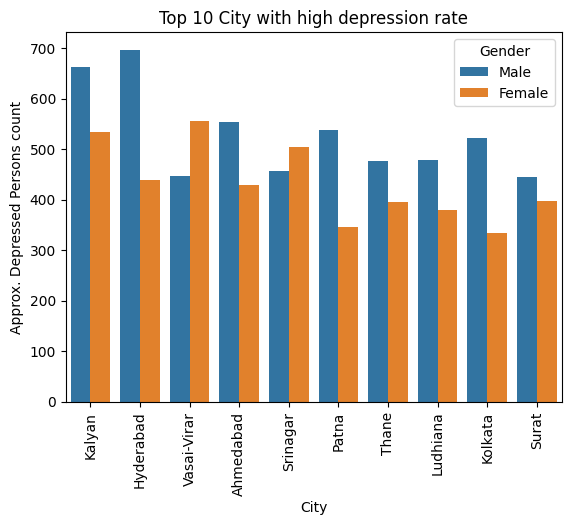

In [80]:
df_dep=tr_data[tr_data['Depression']==1]
plt.title("Top 10 City with high depression rate")
sns.countplot(x='City', data=df_dep, order=df_dep['City'].value_counts().head(10).index, hue='Gender')
plt.ylabel("Approx. Depressed Persons count")
plt.xticks(rotation=90)
plt.show()

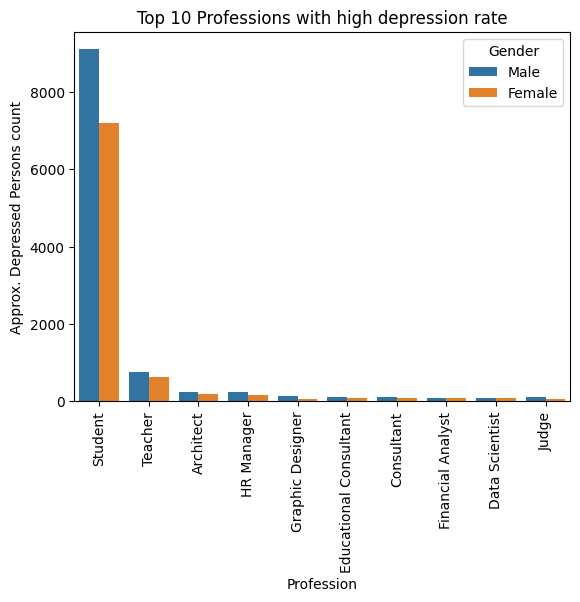

In [81]:
plt.title("Top 10 Professions with high depression rate")
sns.countplot(x='Profession', data=df_dep, order=df_dep['Profession'].value_counts().head(10).index, hue='Gender')
plt.ylabel("Approx. Depressed Persons count")
plt.xticks(rotation=90)
plt.show()

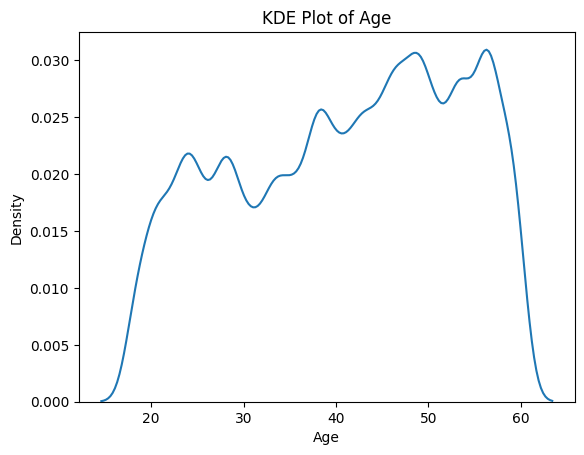

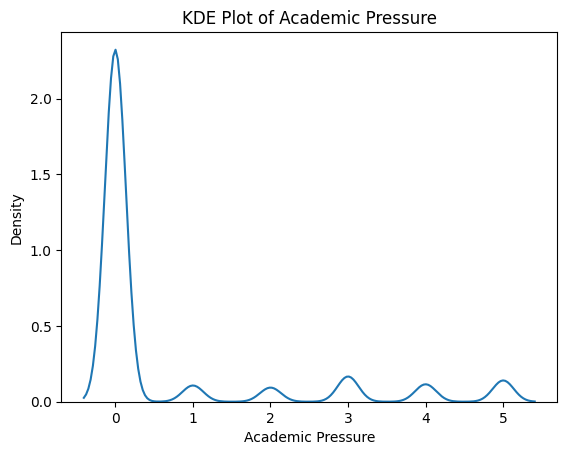

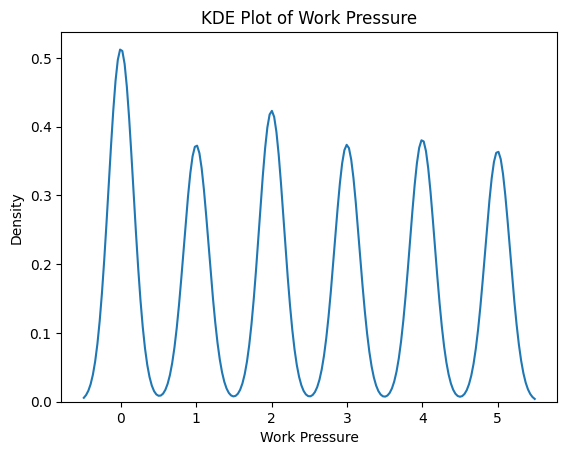

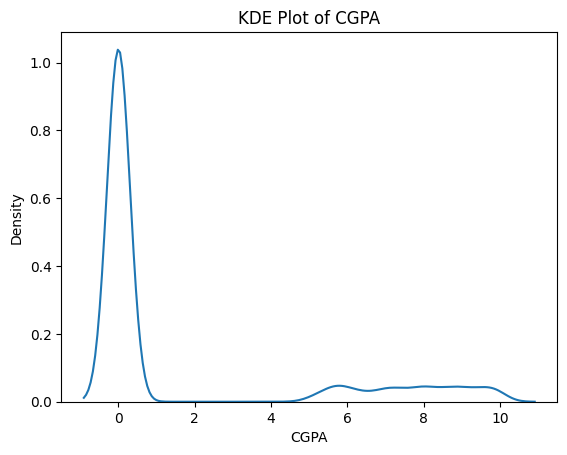

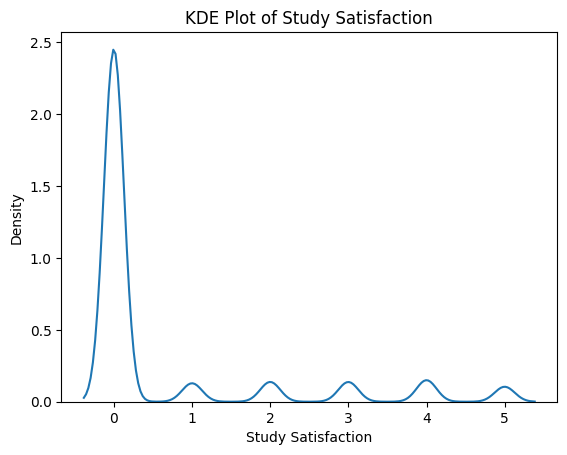

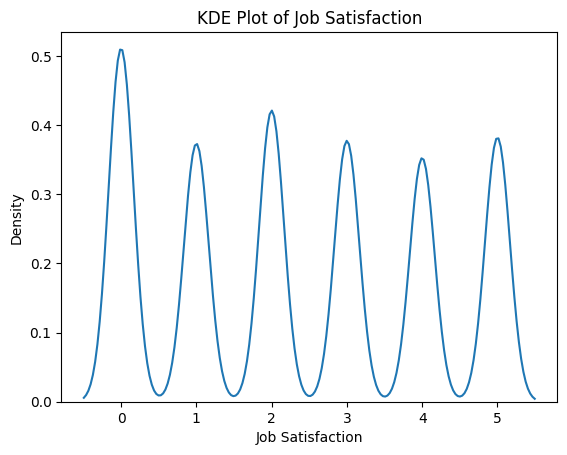

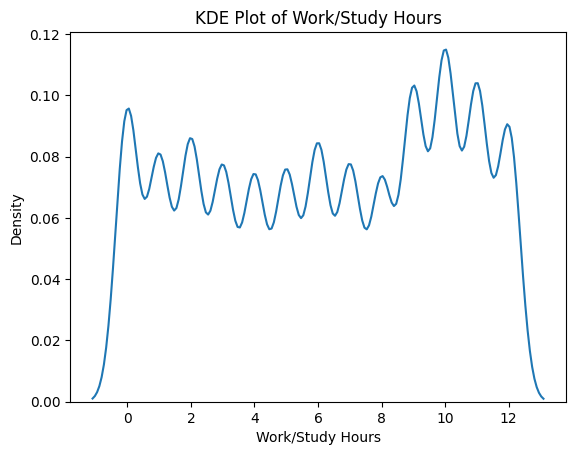

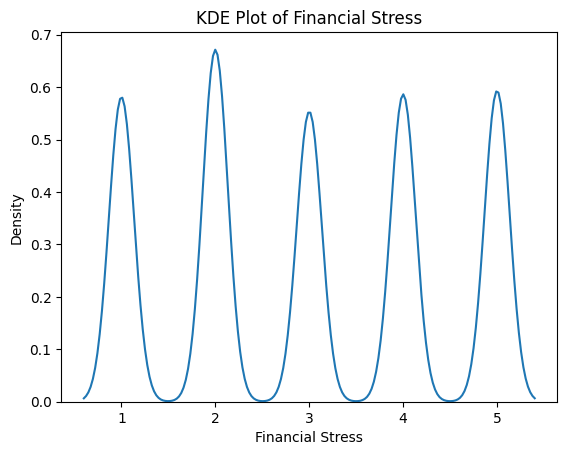

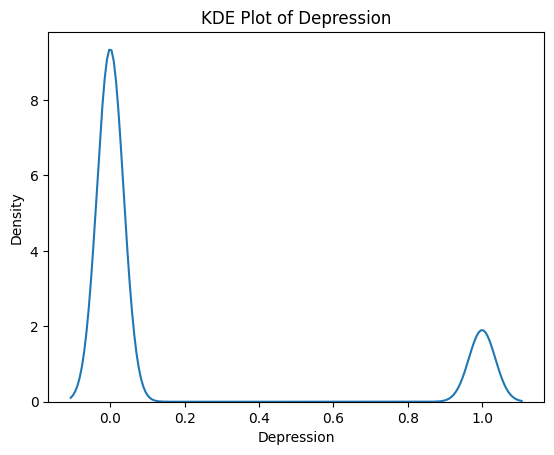

In [82]:
num_col = tr_data.select_dtypes(exclude="object").columns.to_list()

for i in num_col:
  plt.title(f"KDE Plot of {i}")
  sns.kdeplot(tr_data[i])
  plt.show()

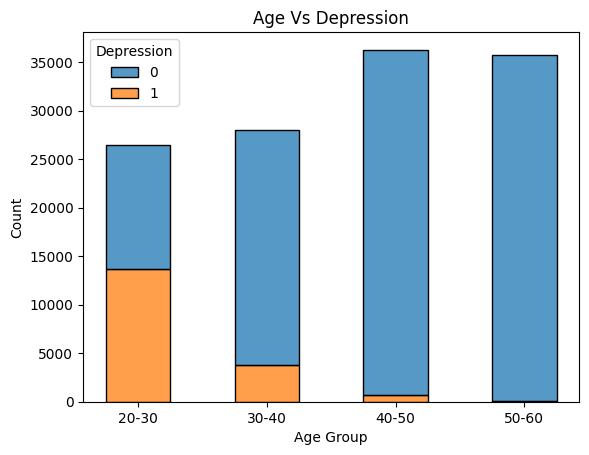

In [83]:
tr_data['Age Group'] = pd.cut(tr_data['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])
plt.title("Age Vs Depression")
sns.histplot(x='Age Group',hue='Depression',data=tr_data,multiple='stack',shrink =0.5)
plt.show()

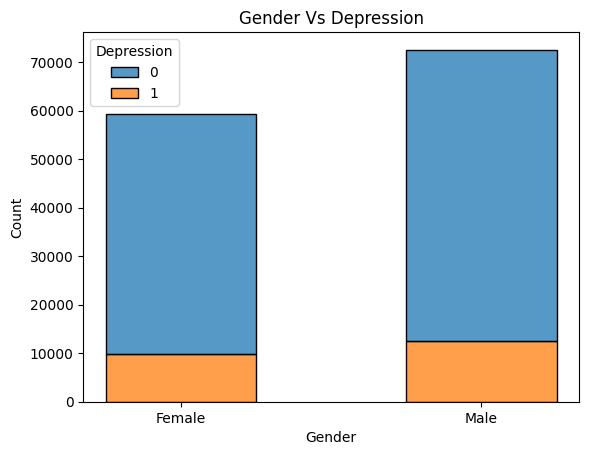

In [84]:
plt.title("Gender Vs Depression")
sns.histplot(x='Gender',hue='Depression',data=tr_data,multiple='stack',shrink=0.5)
plt.show()

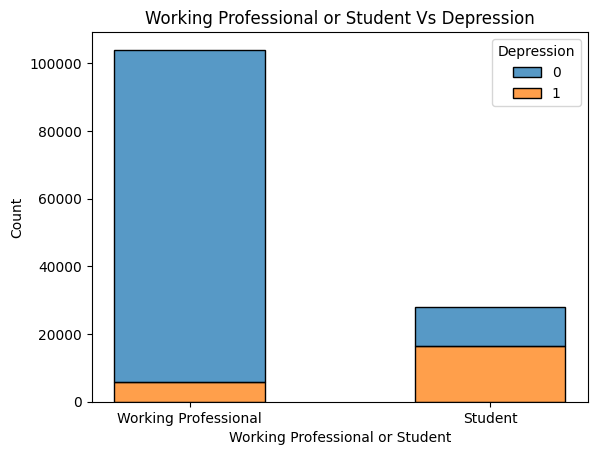

In [85]:
plt.title("Working Professional or Student Vs Depression")
sns.histplot(x='Working Professional or Student',hue='Depression',data=tr_data,multiple='stack',shrink=0.5)
plt.show()

<Axes: title={'center': 'Box plot of numerical columns'}>

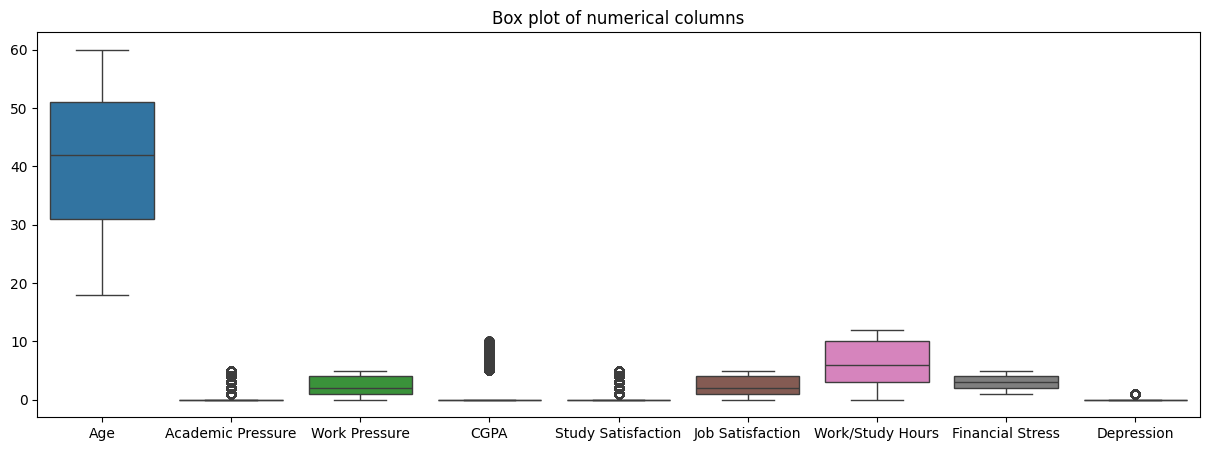

In [86]:
plt.figure(figsize=(15,5))
plt.title("Box plot of numerical columns")
sns.boxplot(tr_data[num_col])

<Axes: >

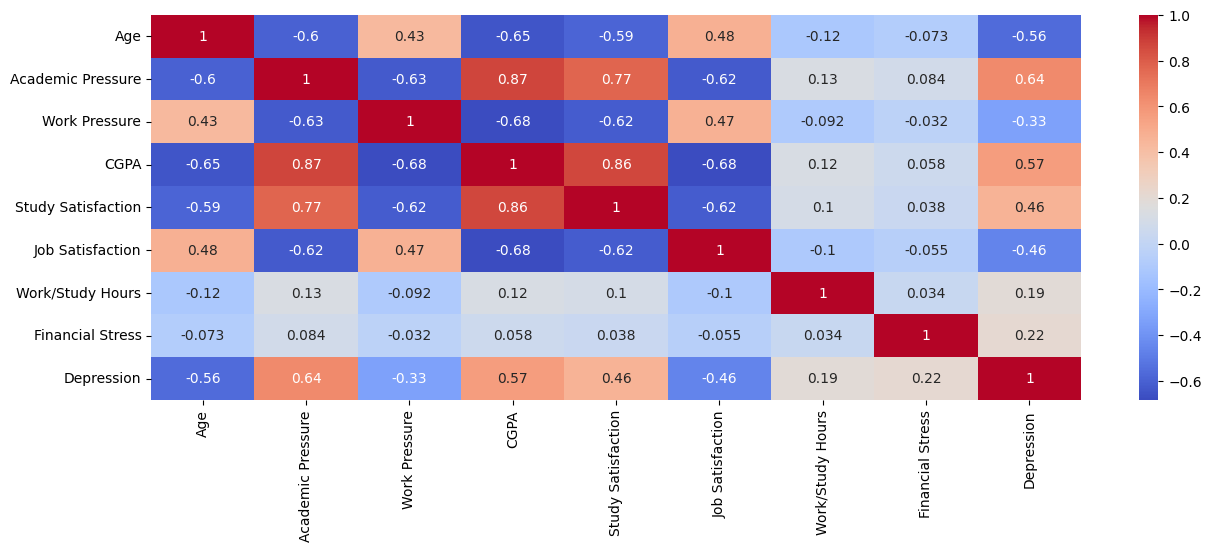

In [87]:
# Correlation plot for numerical columns
plt.figure(figsize=(15,5))
sns.heatmap(tr_data[num_col].corr(),cmap='coolwarm',annot=True)

In [88]:
# Finding outliers
def get_outliers(df,col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  return outliers

df_acpres=get_outliers(tr_data,'Academic Pressure')
df_acpres['Academic Pressure'].value_counts()

,count
Academic Pressure,
3.0,7460
5.0,6293
4.0,5154
1.0,4799
2.0,4176


In [89]:
df_cgpa=get_outliers(tr_data,'CGPA')
df_cgpa['CGPA'].value_counts()

,count
CGPA,
8.0400,821
9.9600,425
5.7400,409
8.9500,371
9.2100,343
...,...
6.6400,1
7.0625,1
6.9800,1


In [90]:
df_study = get_outliers(tr_data,'Study Satisfaction')
df_study['Study Satisfaction'].value_counts()

,count
Study Satisfaction,
4.0,6358
2.0,5837
3.0,5819
1.0,5448
5.0,4420


Outliers are due to null value imputation. So the outliers need not be taken care.

In [91]:
# Encoding categorical variables
cat_col = tr_data.select_dtypes(include="object").columns.to_list()
cat_col

['Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [92]:
for i in cat_col:
  print(tr_data[i].value_counts())
  print("=====================================")

Gender
Male      72578
Female    59336
Name: count, dtype: int64
City
Kalyan           6296
Patna            5662
Vasai-Virar      5387
Kolkata          5330
Meerut           5270
Ahmedabad        5096
Visakhapatnam    4927
Pune             4905
Ludhiana         4834
Rajkot           4828
Srinagar         4823
Mumbai           4704
Indore           4457
Surat            4404
Varanasi         4340
Agra             4296
Hyderabad        4247
Jaipur           4164
Kanpur           4162
Vadodara         4113
Lucknow          4057
Nagpur           3933
Thane            3913
Bangalore        3850
Chennai          3692
Ghaziabad        3416
Delhi            3372
Bhopal           3265
Faridabad        3065
Nashik           3018
Other              88
Name: count, dtype: int64
Working Professional or Student
Working Professional    104032
Student                  27882
Name: count, dtype: int64
Profession
Student                   27855
Teacher                   24906
Content Writer             

In [93]:
tr_data.duplicated().sum()

np.int64(0)

In [94]:
# Initialize Label encoder
tr_data['Degree']=tr_data['Degree'].map({'Other' :0,'Class 12':1, "Bachelors" : 2, "Masters":3, "Doctorate":4})
tr_data['Dietary Habits']=tr_data['Dietary Habits'].map({'Other':0, 'Healthy':3, 'Unhealthy':1, 'Moderate':2})

ts_data['Degree']=ts_data['Degree'].map({'Other' :0,'Class 12':1, "Bachelors" : 2, "Masters":3, "Doctorate":4})
ts_data['Dietary Habits']=ts_data['Dietary Habits'].map({'Other':0, 'Healthy':3, 'Unhealthy':1, 'Moderate':2})

le = LabelEncoder()

for i in tr_data.select_dtypes(include="object").columns.to_list():
  tr_data[i] = le.fit_transform(tr_data[i])

In [95]:
ts_data.select_dtypes(include="object").columns.to_list()

['Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [96]:
ts_data['Family History of Mental Illness'].value_counts()

,count
Family History of Mental Illness,
No,47118
Yes,46682


In [97]:
ts_data['Gender'].value_counts()

,count
Gender,
Male,51262
Female,42538


In [98]:
tr_data['Gender'].value_counts()

,count
Gender,
1,72578
0,59336


In [99]:
for i in ts_data.select_dtypes(include="object").columns.to_list():

  ts_data[i] = le.fit_transform(ts_data[i])

In [100]:
tr_data

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age Group
0,0,49.0,15,1,3,0.0,5.0,0.00,0.0,2.0,3,3,2,0,1.0,2.0,0,0,40-50
1,1,26.0,28,1,32,0.0,4.0,0.00,0.0,3.0,2,1,2,1,7.0,3.0,0,1,20-30
2,1,33.0,30,0,31,5.0,0.0,8.97,2.0,0.0,0,3,2,1,3.0,1.0,0,1,30-40
3,1,22.0,17,1,32,0.0,5.0,0.00,0.0,1.0,2,2,2,1,10.0,1.0,1,1,20-30
4,0,30.0,12,1,2,0.0,1.0,0.00,0.0,1.0,0,1,2,1,9.0,4.0,1,0,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,0,45.0,1,1,32,0.0,2.0,0.00,0.0,5.0,2,2,2,1,1.0,5.0,0,0,40-50
140696,0,41.0,8,1,7,0.0,5.0,0.00,0.0,4.0,1,2,2,1,6.0,5.0,1,0,40-50
140697,0,24.0,13,1,21,0.0,3.0,0.00,0.0,1.0,3,2,2,0,4.0,4.0,0,0,20-30
140698,0,49.0,24,1,26,0.0,5.0,0.00,0.0,2.0,0,2,3,1,10.0,1.0,0,0,40-50


In [101]:
ts_data

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,53.0,30,1,18,0.0,2.0,0.00,0.0,5.0,2,2,2,0,9.0,3.0,1
1,0,58.0,13,1,12,0.0,2.0,0.00,0.0,4.0,2,2,2,0,6.0,4.0,0
2,1,53.0,10,1,32,0.0,4.0,0.00,0.0,1.0,1,2,2,1,12.0,4.0,0
3,0,23.0,23,0,31,5.0,0.0,6.84,1.0,0.0,3,2,2,1,10.0,4.0,0
4,1,47.0,11,1,32,0.0,5.0,0.00,0.0,5.0,1,2,2,1,3.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,0,49.0,10,1,25,0.0,3.0,0.00,0.0,5.0,2,2,2,1,2.0,2.0,1
93796,1,29.0,1,1,25,0.0,5.0,0.00,0.0,1.0,1,2,2,1,11.0,3.0,1
93797,1,24.0,30,0,31,1.0,0.0,7.51,4.0,0.0,1,2,2,0,7.0,1.0,0
93798,0,23.0,11,1,21,0.0,4.0,0.00,0.0,2.0,0,3,2,1,7.0,5.0,1


In [102]:
tr_data.duplicated().sum()

np.int64(0)

In [103]:
tr_data.drop_duplicates(inplace=True)

In [104]:
tr_data.duplicated().sum()

np.int64(0)

In [105]:
tr_data.shape

(131914, 19)

In [106]:
tr_data

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Age Group
0,0,49.0,15,1,3,0.0,5.0,0.00,0.0,2.0,3,3,2,0,1.0,2.0,0,0,40-50
1,1,26.0,28,1,32,0.0,4.0,0.00,0.0,3.0,2,1,2,1,7.0,3.0,0,1,20-30
2,1,33.0,30,0,31,5.0,0.0,8.97,2.0,0.0,0,3,2,1,3.0,1.0,0,1,30-40
3,1,22.0,17,1,32,0.0,5.0,0.00,0.0,1.0,2,2,2,1,10.0,1.0,1,1,20-30
4,0,30.0,12,1,2,0.0,1.0,0.00,0.0,1.0,0,1,2,1,9.0,4.0,1,0,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,0,45.0,1,1,32,0.0,2.0,0.00,0.0,5.0,2,2,2,1,1.0,5.0,0,0,40-50
140696,0,41.0,8,1,7,0.0,5.0,0.00,0.0,4.0,1,2,2,1,6.0,5.0,1,0,40-50
140697,0,24.0,13,1,21,0.0,3.0,0.00,0.0,1.0,3,2,2,0,4.0,4.0,0,0,20-30
140698,0,49.0,24,1,26,0.0,5.0,0.00,0.0,2.0,0,2,3,1,10.0,1.0,0,0,40-50


In [107]:
ts_data

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,53.0,30,1,18,0.0,2.0,0.00,0.0,5.0,2,2,2,0,9.0,3.0,1
1,0,58.0,13,1,12,0.0,2.0,0.00,0.0,4.0,2,2,2,0,6.0,4.0,0
2,1,53.0,10,1,32,0.0,4.0,0.00,0.0,1.0,1,2,2,1,12.0,4.0,0
3,0,23.0,23,0,31,5.0,0.0,6.84,1.0,0.0,3,2,2,1,10.0,4.0,0
4,1,47.0,11,1,32,0.0,5.0,0.00,0.0,5.0,1,2,2,1,3.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,0,49.0,10,1,25,0.0,3.0,0.00,0.0,5.0,2,2,2,1,2.0,2.0,1
93796,1,29.0,1,1,25,0.0,5.0,0.00,0.0,1.0,1,2,2,1,11.0,3.0,1
93797,1,24.0,30,0,31,1.0,0.0,7.51,4.0,0.0,1,2,2,0,7.0,1.0,0
93798,0,23.0,11,1,21,0.0,4.0,0.00,0.0,2.0,0,3,2,1,7.0,5.0,1


In [108]:
tr_data['Dietary Habits'].value_counts()

,count
Dietary Habits,
2,46883
1,42791
3,42222
0,18


In [109]:
tr_data['Degree'].value_counts()

,count
Degree,
2,73112
3,49465
1,6129
4,3100
0,108


In [110]:
tr_data['Family History of Mental Illness'].value_counts()

,count
Family History of Mental Illness,
0,66272
1,65642


In [111]:
tr_data["Have you ever had suicidal thoughts ?"].value_counts()

,count
Have you ever had suicidal thoughts ?,
0,67407
1,64507


In [112]:
tr_data['Gender'].value_counts()

,count
Gender,
1,72578
0,59336


In [113]:
tr_data['Working Professional or Student'].value_counts()

,count
Working Professional or Student,
1,104032
0,27882


In [114]:
tr_data['Sleep Duration'].value_counts()

,count
Sleep Duration,
2,35864
1,34916
3,30822
0,30235
4,77


In [115]:
tr_data['City'].value_counts()

,count
City,
11,6296
21,5662
29,5387
13,5330
16,5270
1,5096
30,4927
22,4905
15,4834


In [116]:
tr_data['Profession'].value_counts()

,count
Profession,
31,27855
32,24906
7,7813
1,4370
6,4228
17,4022
24,3893
11,3256
2,3161


In [117]:
num_col=['Age',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction',
 'Work/Study Hours',
 'Financial Stress']


In [118]:
# MinMax scaling of training data
scaler = MinMaxScaler()
tr_data[num_col] = scaler.fit_transform(tr_data[num_col])

In [119]:
# MinMax scaling of testing data
ts_data[num_col] = scaler.transform(ts_data[num_col])

In [120]:
tr_data.drop(['Age Group'],axis=1,inplace=True)
tr_data

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,0.738095,15,1,3,0.0,1.0,0.000,0.0,0.4,3,3,2,0,0.083333,0.25,0,0
1,1,0.190476,28,1,32,0.0,0.8,0.000,0.0,0.6,2,1,2,1,0.583333,0.50,0,1
2,1,0.357143,30,0,31,1.0,0.0,0.897,0.4,0.0,0,3,2,1,0.250000,0.00,0,1
3,1,0.095238,17,1,32,0.0,1.0,0.000,0.0,0.2,2,2,2,1,0.833333,0.00,1,1
4,0,0.285714,12,1,2,0.0,0.2,0.000,0.0,0.2,0,1,2,1,0.750000,0.75,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,0,0.642857,1,1,32,0.0,0.4,0.000,0.0,1.0,2,2,2,1,0.083333,1.00,0,0
140696,0,0.547619,8,1,7,0.0,1.0,0.000,0.0,0.8,1,2,2,1,0.500000,1.00,1,0
140697,0,0.142857,13,1,21,0.0,0.6,0.000,0.0,0.2,3,2,2,0,0.333333,0.75,0,0
140698,0,0.738095,24,1,26,0.0,1.0,0.000,0.0,0.4,0,2,3,1,0.833333,0.00,0,0


In [121]:
ts_data

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,0.833333,30,1,18,0.0,0.4,0.000,0.0,1.0,2,2,2,0,0.750000,0.50,1
1,0,0.952381,13,1,12,0.0,0.4,0.000,0.0,0.8,2,2,2,0,0.500000,0.75,0
2,1,0.833333,10,1,32,0.0,0.8,0.000,0.0,0.2,1,2,2,1,1.000000,0.75,0
3,0,0.119048,23,0,31,1.0,0.0,0.684,0.2,0.0,3,2,2,1,0.833333,0.75,0
4,1,0.690476,11,1,32,0.0,1.0,0.000,0.0,1.0,1,2,2,1,0.250000,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,0,0.738095,10,1,25,0.0,0.6,0.000,0.0,1.0,2,2,2,1,0.166667,0.25,1
93796,1,0.261905,1,1,25,0.0,1.0,0.000,0.0,0.2,1,2,2,1,0.916667,0.50,1
93797,1,0.142857,30,0,31,0.2,0.0,0.751,0.8,0.0,1,2,2,0,0.583333,0.00,0
93798,0,0.119048,11,1,21,0.0,0.8,0.000,0.0,0.4,0,3,2,1,0.583333,1.00,1


# **Building Model with Keras**

In [122]:
# Split data into val and tar
val = tr_data.drop('Depression',axis=1)
tar = tr_data['Depression']

tr, ts, trl, tsl = train_test_split(val, tar, test_size= 0.20, random_state= 42)

In [123]:
val.shape

(131914, 17)

In [124]:
tar.value_counts()

,count
Depression,
0,109646
1,22268


In [125]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(17,)),
    tf.keras.layers.Dense(128,activation='relu',),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',metrics=['accuracy',Precision(name='precision'),
                                                  Recall(name='recall'),F1Score(name='f1_score')])


model.fit(tr, trl, epochs=50,validation_data=(ts,tsl),validation_split=0.2, batch_size=128)

Epoch 1/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8306 - f1_score: 0.2886 - loss: 0.3918 - precision: 0.4491 - recall: 0.1524 - val_accuracy: 0.9338 - val_f1_score: 0.2915 - val_loss: 0.1715 - val_precision: 0.8629 - val_recall: 0.7274
Epoch 2/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9326 - f1_score: 0.2878 - loss: 0.1817 - precision: 0.7996 - recall: 0.7994 - val_accuracy: 0.9408 - val_f1_score: 0.2915 - val_loss: 0.1820 - val_precision: 0.8325 - val_recall: 0.8172
Epoch 3/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9358 - f1_score: 0.2883 - loss: 0.1681 - precision: 0.8137 - recall: 0.8026 - val_accuracy: 0.9362 - val_f1_score: 0.2915 - val_loss: 0.2151 - val_precision: 0.7828 - val_recall: 0.8663
Epoch 4/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9371 - f1_score: 0.2895 - loss: 0.1659 - precision: 0.8151 - recall: 0.8131 - val_accuracy: 0.9400 - val_f1_score: 0.2915 - val_loss: 0.1875 - val_precision: 0.8401 - val_recall:

In [126]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,061 (156.49 KB)

 Trainable params: 13,353 (52.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 26,708 (104.33 KB)

In [127]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [128]:
import os
os.makedirs('/content/drive/MyDrive/Project-5-Predict-depression', exist_ok=True)


In [129]:
model.save('/content/drive/MyDrive/Project-5-Predict-depression/model.keras')


In [130]:
# Using RF claasifier to identify important features
model_01 = RandomForestClassifier(n_estimators= 100, random_state= 42, max_depth= 4,class_weight='balanced')

model_01.fit(val, tar)

RandomForestClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [131]:
# select features based on score threshold

pd.DataFrame({
    "Columns": val.columns,
    "Score": model_01.feature_importances_ * 100
}).sort_values('Score', ascending= False).reset_index(drop= True)

,Columns,Score
0,Age,32.027762
1,Academic Pressure,14.559042
2,CGPA,10.894031
3,Work Pressure,10.015752
4,Have you ever had suicidal thoughts ?,9.155013
5,Job Satisfaction,8.837185
6,Study Satisfaction,7.402423
7,Working Professional or Student,2.603905
8,Financial Stress,2.031165
9,Profession,1.127515


In [132]:
s_col = pd.DataFrame({
    "Columns": val.columns,
    "Score": model_01.feature_importances_ * 100
}).sort_values('Score', ascending= False).head(13)['Columns'].values.tolist()

In [133]:
len(s_col)

13

In [134]:
s_col

['Age',
 'Academic Pressure',
 'CGPA',
 'Work Pressure',
 'Have you ever had suicidal thoughts ?',
 'Job Satisfaction',
 'Study Satisfaction',
 'Working Professional or Student',
 'Financial Stress',
 'Profession',
 'Work/Study Hours',
 'Dietary Habits',
 'Degree']

In [135]:
rf_val = val[s_col]
rf_tar = tar

rf_tr, rf_ts, rf_trl, rf_tsl = train_test_split(rf_val, rf_tar, test_size= 0.20, random_state= 66)

In [136]:
rf_val

,Age,Academic Pressure,CGPA,Work Pressure,Have you ever had suicidal thoughts ?,Job Satisfaction,Study Satisfaction,Working Professional or Student,Financial Stress,Profession,Work/Study Hours,Dietary Habits,Degree
0,0.738095,0.0,0.000,1.0,0,0.4,0.0,1,0.25,3,0.083333,3,2
1,0.190476,0.0,0.000,0.8,1,0.6,0.0,1,0.50,32,0.583333,1,2
2,0.357143,1.0,0.897,0.0,1,0.0,0.4,0,0.00,31,0.250000,3,2
3,0.095238,0.0,0.000,1.0,1,0.2,0.0,1,0.00,32,0.833333,2,2
4,0.285714,0.0,0.000,0.2,1,0.2,0.0,1,0.75,2,0.750000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,0.642857,0.0,0.000,0.4,1,1.0,0.0,1,1.00,32,0.083333,2,2
140696,0.547619,0.0,0.000,1.0,1,0.8,0.0,1,1.00,7,0.500000,2,2
140697,0.142857,0.0,0.000,0.6,0,0.2,0.0,1,0.75,21,0.333333,2,2
140698,0.738095,0.0,0.000,1.0,1,0.4,0.0,1,0.00,26,0.833333,2,3


In [137]:
rf_tar.value_counts()

,count
Depression,
0,109646
1,22268


In [138]:
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(13,)),
    tf.keras.layers.Dense(128,activation='relu',),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',metrics=['accuracy',Precision(name='precision'),
                                                  Recall(name='recall'),F1Score(name='f1_score')])


model_2.fit(rf_tr, rf_trl, epochs=50,validation_data=(rf_ts,rf_tsl),validation_split=0.2, batch_size=128)

Epoch 1/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8045 - f1_score: 0.2884 - loss: 0.6382 - precision: 0.1824 - recall: 0.0444 - val_accuracy: 0.8327 - val_f1_score: 0.2867 - val_loss: 0.5211 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8313 - f1_score: 0.2887 - loss: 0.5036 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8327 - val_f1_score: 0.2867 - val_loss: 0.4669 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8302 - f1_score: 0.2903 - loss: 0.4651 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8327 - val_f1_score: 0.2867 - val_loss: 0.4539 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
825/825 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8306 - f1_score: 0.2897 - loss: 0.4561 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.8327 - val_f1_score: 0.2867 - val_lo

In [139]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,525 (150.49 KB)

 Trainable params: 12,841 (50.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,684 (100.33 KB)

In [140]:
model_2.save('/content/drive/MyDrive/Project-5-Predict-depression/model_rf.keras')

## **Model Validation**

In [141]:
# Result for training data
result = model.evaluate(tr,trl)

3298/3298 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9387 - f1_score: 0.2889 - loss: 0.2116 - precision: 0.7819 - recall: 0.8832


In [142]:
# Result for testing data
result = model.evaluate(ts,tsl)

825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9345 - f1_score: 0.2849 - loss: 0.2161 - precision: 0.7625 - recall: 0.8790


In [143]:
# Result with only selected important features for training data
result = model_2.evaluate(rf_tr,rf_trl)

3298/3298 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8305 - f1_score: 0.2898 - loss: 0.4551 - precision: 0.0000e+00 - recall: 0.0000e+00


In [144]:
# Result with only selected important features for testing data
result = model_2.evaluate(rf_ts,rf_tsl)

825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8347 - f1_score: 0.2836 - loss: 0.4484 - precision: 0.0000e+00 - recall: 0.0000e+00


In [145]:
tr_pred = model.predict(tr)
ts_pred = model.predict(ts)

3298/3298 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [146]:
cm=confusion_matrix(trl.tolist(),tr_pred.round().astype(int).flatten().tolist())

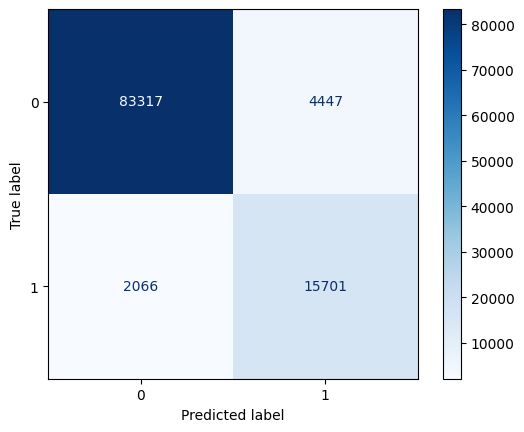

In [147]:
ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot(cmap='Blues')

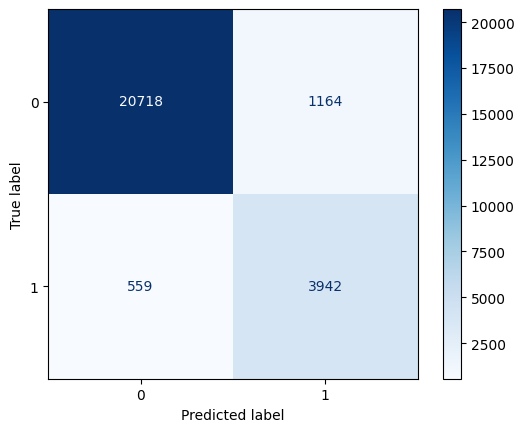

In [148]:
cms=confusion_matrix(tsl,ts_pred.round())
ConfusionMatrixDisplay(cms,display_labels=[0,1]).plot(cmap='Blues')

In [149]:
classification_report(trl,tr_pred.round())

'              precision    recall  f1-score   support\n\n           0       0.98      0.95      0.96     87764\n           1       0.78      0.88      0.83     17767\n\n    accuracy                           0.94    105531\n   macro avg       0.88      0.92      0.90    105531\nweighted avg       0.94      0.94      0.94    105531\n'

In [150]:
classification_report(tsl,ts_pred.round())

'              precision    recall  f1-score   support\n\n           0       0.97      0.95      0.96     21882\n           1       0.77      0.88      0.82      4501\n\n    accuracy                           0.93     26383\n   macro avg       0.87      0.91      0.89     26383\nweighted avg       0.94      0.93      0.94     26383\n'

# **Predicting Testdata**

In [151]:
sample_sub['Depression']


,Depression
0,0
1,0
2,0
3,0
4,0
...,...
93795,0
93796,0
93797,0
93798,0


In [152]:
best_model= tf.keras.models.load_model('/content/drive/MyDrive/Project-5-Predict-depression/model.keras')
ts_predict= best_model.predict(ts_data)

2932/2932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [153]:
ts_predlist=ts_predict.round().astype(int).flatten().tolist()

In [154]:
final_pred=pd.DataFrame({
    'id' : sample_sub['id'],
    'Depression' : ts_predlist
})
final_pred.to_csv('/content/drive/MyDrive/Project-5-Predict-depression/final_predictions.csv',index=False)

In [155]:
pd.read_csv('/content/drive/MyDrive/Project-5-Predict-depression/final_predictions.csv')

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [156]:
sample_sub

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0
...,...,...
93795,234495,0
93796,234496,0
93797,234497,0
93798,234498,0


In [157]:
ts_actual = sample_sub['Depression'].tolist()
accuracy_score(ts_actual,ts_predlist)

0.794179104477612

In [158]:
ts_data

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1,0.833333,30,1,18,0.0,0.4,0.000,0.0,1.0,2,2,2,0,0.750000,0.50,1
1,0,0.952381,13,1,12,0.0,0.4,0.000,0.0,0.8,2,2,2,0,0.500000,0.75,0
2,1,0.833333,10,1,32,0.0,0.8,0.000,0.0,0.2,1,2,2,1,1.000000,0.75,0
3,0,0.119048,23,0,31,1.0,0.0,0.684,0.2,0.0,3,2,2,1,0.833333,0.75,0
4,1,0.690476,11,1,32,0.0,1.0,0.000,0.0,1.0,1,2,2,1,0.250000,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,0,0.738095,10,1,25,0.0,0.6,0.000,0.0,1.0,2,2,2,1,0.166667,0.25,1
93796,1,0.261905,1,1,25,0.0,1.0,0.000,0.0,0.2,1,2,2,1,0.916667,0.50,1
93797,1,0.142857,30,0,31,0.2,0.0,0.751,0.8,0.0,1,2,2,0,0.583333,0.00,0
93798,0,0.119048,11,1,21,0.0,0.8,0.000,0.0,0.4,0,3,2,1,0.583333,1.00,1


# **Testing with single entry**

In [159]:
data=pd.DataFrame({
    'id' : [2],
    'Name'	: ['Nalini'],
    'Gender': ['Female'],
    'Age' : [23],
    'City' : ['Rajkot'],
    'Working Professional or Student' : ['Student'],
    'Profession' : ['Student'],
    'Academic Pressure': [5.0],
    'Work Pressure': [0.0],
    'CGPA': [6.84],
    'Study Satisfaction':[1.0],
    'Job Satisfaction': [0.0],
    'Sleep Duration': ['More than 8 hours'],
    'Dietary Habits': ['Moderate'],
    'Degree':['BSc'],
    "Have you ever had suicidal thoughts ?": ['Yes'],
    'Work/Study Hours': [10.0],
    'Financial Stress': [4.0],
    'Family History of Mental Illness' : ['No']
})
data

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,2,Nalini,Female,23,Rajkot,Student,Student,5.0,0.0,6.84,1.0,0.0,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No


In [160]:
def preprocess(df):
  df = clean_data(df)
  df['Degree']=df['Degree'].map({'Other' :0,'Class 12':1, "Bachelors" : 2, "Masters":3, "Doctorate":4})
  df['Dietary Habits']=df['Dietary Habits'].map({'Other':0, 'Healthy':3, 'Unhealthy':1, 'Moderate':2})
  df['Family History of Mental Illness']=df['Family History of Mental Illness'].map({'No':0,'Yes':1})
  df['Have you ever had suicidal thoughts ?']=df['Have you ever had suicidal thoughts ?'].map({'No':0,'Yes':1})
  df['Working Professional or Student']=df['Working Professional or Student'].map({'Student':0,'Working Professional':1})
  df['Gender']=df['Gender'].map({'Male':1,'Female':0})
  df['Sleep Duration']=df['Sleep Duration'].map({'Less than 5 hours':2,'7-8 hours':1,'More than 8 hours':3,
                                                 '5-6 hours':0,'Other':4})
  df['City']=df['City'].map({'Kalyan':11, 'Patna':21, 'Vasai-Virar':29, 'Kolkata':13, 'Meerut':16, 'Ahmedabad':1,
                             'Visakhapatnam':30, 'Pune':22, 'Ludhiana':15, 'Rajkot':23, 'Srinagar':24, 'Mumbai':17,
                             'Indore':9, 'Surat':25, 'Varanasi':28, 'Agra':0, 'Hyderabad':8, 'Jaipur':10, 'Kanpur':12,
                             'Vadodara':27, 'Lucknow':14, 'Nagpur':18, 'Thane':26, 'Bangalore':2, 'Chennai':4, 'Ghaziabad':7,
                             'Delhi':5, 'Bhopal':3, 'Faridabad':6, 'Nashik':19, 'Other':20})

  df['Profession']= df['Profession'].map({'Student':31, 'Teacher':32, 'Content Writer':7, 'Architect':1, 'Consultant':6,
                                          'HR Manager':17, 'Pharmacist':24, 'Doctor':11, 'Business Analyst':2,
                                          'Entrepreneur':14, 'Chemist':4, 'Financial Analyst':15, 'Chef':3,
                                          'Educational Consultant':12, 'Data Scientist':9, 'Researcher':28, 'Lawyer':19,
                                          'Customer Support':8, 'Marketing Manager':21, 'Pilot':25, 'Travel Consultant':33,
                                          'Plumber':26, 'Sales Executive':29, 'Manager':20, 'Judge':18, 'Electrician':13,
                                          'Software Engineer':30, 'Civil Engineer':5, 'UX/UI:Designer':34, 'Digital Marketer':10,
                                          'Accountant':0, 'Mechanical Engineer':22, 'Graphic Designer':16, 'Research Analyst':27,
                                          'Other':23})



  return df

In [161]:
data_c= preprocess(data)
data_c

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,23,23,0,31,5.0,0.0,6.84,1.0,0.0,3,2,2,1,10.0,4.0,0


In [162]:
num_col=['Age','Academic Pressure','Work Pressure','CGPA','Study Satisfaction','Job Satisfaction','Work/Study Hours',
           'Financial Stress']
# scaler = MinMaxScaler()
data_c[num_col] = scaler.transform(data_c[num_col])

In [163]:
data_c

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,0.119048,23,0,31,1.0,0.0,0.684,0.2,0.0,3,2,2,1,0.833333,0.75,0


In [164]:
data_c

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,0,0.119048,23,0,31,1.0,0.0,0.684,0.2,0.0,3,2,2,1,0.833333,0.75,0


In [165]:
data_c.values

array([[ 0.        ,  0.11904762, 23.        ,  0.        , 31.        ,
         1.        ,  0.        ,  0.684     ,  0.2       ,  0.        ,
         3.        ,  2.        ,  2.        ,  1.        ,  0.83333333,
         0.75      ,  0.        ]])

In [166]:
new_sample_tensor = tf.convert_to_tensor(data_c.values, dtype=tf.float32) # Specify the correct dtype

In [167]:
new_sample_tensor

<tf.Tensor: shape=(1, 17), dtype=float32, numpy=
array([[ 0.        ,  0.11904762, 23.        ,  0.        , 31.        ,
         1.        ,  0.        ,  0.684     ,  0.2       ,  0.        ,
         3.        ,  2.        ,  2.        ,  1.        ,  0.8333333 ,
         0.75      ,  0.        ]], dtype=float32)>

In [168]:
# data_c=np.array([26,    0.0,    0.0,    0.0,    1,      3.0,    4.0,    1,      3.0,    7.0,    2,      32,     1])
new_sample_tensor = tf.convert_to_tensor(data_c.values, dtype=tf.float32)

In [169]:
best_model= tf.keras.models.load_model('/content/drive/MyDrive/Project-5-Predict-depression/model.keras')
ts_predict= best_model.predict(new_sample_tensor)
ts_predict.round().astype(int).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([1])

In [170]:
ts_predict.round().astype(int).flatten()[0]

np.int64(1)

# **Streamlit App**

In [171]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.2 MB/s eta 0:00:00


In [172]:
from pyngrok import ngrok
ngrok.set_auth_token("30KwR5ga0Vn9OtYNtI04zeZnnVL_6MiSjKv2387sQbijjpHSS")


In [173]:
import shutil

src_path = "/content/drive/MyDrive/Project-5-Predict-depression/model.keras"
dst_path = "/content/model.keras"

shutil.copy(src_path, dst_path)
print("✅ Model copied to /content/")


✅ Model copied to /content/


In [184]:
%%writefile app.py
import streamlit as st
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# ----------------- Prediction Class -----------------
class Prediction:
    def __init__(self, df):
        self.df = df
        self.encoders = {}  # store separate encoders
        self.scaler = None

    def Grouping_degree(self, degree, df):
        for i in degree:
            if isinstance(i, str):
                if i.startswith('B') or i == 'MBBS' or i == 'LLB':
                    df['Degree'] = df['Degree'].replace(i, 'Bachelors')
                elif i.startswith('M') or i == 'LLM':
                    df['Degree'] = df['Degree'].replace(i, 'Masters')
                elif i.startswith('P'):
                    df['Degree'] = df['Degree'].replace(i, 'Doctorate')
        return df

    def clean_data(self, df):
        drop_cols = [c for c in ['id', 'Name'] if c in df.columns]
        df.drop(drop_cols, axis=1, inplace=True, errors="ignore")

        num_fill = {
            'Academic Pressure': 0.0, 'Work Pressure': 0.0, 'CGPA': 0.0,
            'Study Satisfaction': 0.0, 'Job Satisfaction': 0.0, 'Financial Stress': 0.0
        }
        for col, val in num_fill.items():
            if col in df.columns:
                df[col] = df[col].fillna(val)

        if "Dietary Habits" in df.columns:
            df['Dietary Habits'] = df['Dietary Habits'].replace(
                ['Less than Healthy', 'No Healthy', 'Less Healthy'], 'Unhealthy')
            df['Dietary Habits'] = df['Dietary Habits'].replace('More Healthy', 'Healthy')
            df['Dietary Habits'] = df['Dietary Habits'].apply(
                lambda x: x if x in ['Healthy', 'Unhealthy', 'Moderate'] else 'Other')

        if "Degree" in df.columns:
            df['Degree'] = df['Degree'].fillna('Other')
            degree = list(df['Degree'].unique())
            df = self.Grouping_degree(degree, df)

        if "Profession" in df.columns:
            df['Profession'] = df['Profession'].fillna('Other')
            df['Profession'] = df['Profession'].replace({
                'City Manager': 'Manager', 'Dev': 'Software Engineer',
                'Medical Doctor': 'Doctor', 'Finanancial Analyst': 'Financial Analyst'
            })

        return df

    def Preprocess(self):
        tr_data = pd.read_csv(
            "https://raw.githubusercontent.com/amoghchetty/predicting-despression-via-deep-learning-/refs/heads/main/train.csv"
        )
        tr_data = self.clean_data(tr_data)
        self.df = self.clean_data(self.df)

        mapping_degree = {'Other': 0, 'Class 12': 1, "Bachelors": 2, "Masters": 3, "Doctorate": 4}
        mapping_diet = {'Other': 0, 'Healthy': 3, 'Unhealthy': 1, 'Moderate': 2}

        if "Degree" in self.df.columns:
            self.df['Degree'] = self.df['Degree'].map(mapping_degree).fillna(0)
        if "Dietary Habits" in self.df.columns:
            self.df['Dietary Habits'] = self.df['Dietary Habits'].map(mapping_diet).fillna(0)

        tr_data['Degree'] = tr_data['Degree'].map(mapping_degree).fillna(0)
        tr_data['Dietary Habits'] = tr_data['Dietary Habits'].map(mapping_diet).fillna(0)

        cat_cols = tr_data.select_dtypes(include="object").columns.to_list()
        for col in cat_cols:
            le = LabelEncoder()
            tr_data[col] = tr_data[col].astype(str)
            self.df[col] = self.df[col].astype(str)

            tr_data[col] = le.fit_transform(tr_data[col])
            self.df[col] = self.df[col].map(
                lambda x: le.transform([x])[0] if x in le.classes_ else -1
            )
            self.df[col] = self.df[col].replace(-1, 0)
            self.encoders[col] = le

        num_col = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
                   'Study Satisfaction', 'Job Satisfaction',
                   'Work/Study Hours', 'Financial Stress']

        self.scaler = MinMaxScaler()
        tr_data[num_col] = self.scaler.fit_transform(tr_data[num_col])
        self.df[num_col] = self.df[num_col].fillna(0)
        self.df[num_col] = self.scaler.transform(self.df[num_col])

        return self.df

# ----------------- Load Model -----------------
base_dir = os.path.dirname(os.path.abspath(__file__))
model_path = os.path.join(base_dir, "model.keras")
best_model = tf.keras.models.load_model(model_path)

# ----------------- Sidebar Navigation -----------------
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Project Introduction", "Mental Health Prediction", "Creator Info"])

# ----------------- Page 1: Project Introduction -----------------
if page == "Project Introduction":
    st.title(" Mental Health Prediction Project")
    st.markdown("""
    Welcome to the **Mental Health Prediction App**!
    This project uses **Machine Learning** to analyze various lifestyle, academic, and personal factors
    to predict whether a person may be experiencing mental health challenges.

    ### Objectives:
    - Help spread awareness about mental health.
    - Provide an easy-to-use interface for predictions.
    - Encourage users to take care of their well-being.

     **Disclaimer**: This tool is for educational and awareness purposes only.
    It is **not a substitute** for professional medical advice.
    """)

# ----------------- Page 2: Prediction -----------------
elif page == "Mental Health Prediction":
    st.title(" Mental Health Prediction")

    name = st.text_input("Enter your Name")
    gen = st.selectbox("Select your Gender", ('Male', 'Female'))
    age = st.number_input("Enter your Age", min_value=1, max_value=100, step=1)
    city_options = [
        "Ahmedabad", "Bangalore", "Chennai", "Delhi", "Hyderabad",
        "Kolkata", "Mumbai", "Pune", "Other"
    ]
    city = st.selectbox("Select your City", city_options)
    role = st.selectbox("Select your role", ("Working Professional", "Student"))
    prof = st.text_input("Enter your Profession")
    acpres = st.selectbox("Rate your Academic Pressure", (0, 1, 2, 3, 4, 5))
    wkpres = st.selectbox("Rate your Work Pressure", (0, 1, 2, 3, 4, 5))
    cgpa = st.number_input("Enter your CGPA", min_value=0.0, max_value=10.0, step=0.1)
    ssat = st.selectbox("Rate your Study Satisfaction", (0, 1, 2, 3, 4, 5))
    jsat = st.selectbox("Rate your Job Satisfaction", (0, 1, 2, 3, 4, 5))
    sleepdur = st.text_input("Enter your Sleep Duration")
    diet = st.selectbox("Select your Dietary Habits", ('Healthy', 'Unhealthy', 'Moderate'))
    deg = st.text_input("Enter your Degree")
    suicide = st.selectbox("Have you ever had suicidal thoughts ?", ('No', 'Yes'))
    hrs = st.number_input("Enter your Work/Study Hours", min_value=0, max_value=24, step=1)
    fstress = st.selectbox("Rate your Financial Stress", (0, 1, 2, 3, 4, 5))
    fhis = st.selectbox("Family History of Mental Illness", ('No', 'Yes'))

    if 'clicked' not in st.session_state:
        st.session_state.clicked = False

    def click_button():
        st.session_state.clicked = True

    st.button('Submit', on_click=click_button)

    if st.session_state.clicked:
        try:
            data = pd.DataFrame([{
                'Name': name, 'Gender': gen, 'Age': age,
                'City': city, 'Working Professional or Student': role,
                'Profession': prof, 'Academic Pressure': acpres, 'Work Pressure': wkpres,
                'CGPA': cgpa, 'Study Satisfaction': ssat, 'Job Satisfaction': jsat,
                'Sleep Duration': sleepdur, 'Dietary Habits': diet, 'Degree': deg,
                "Have you ever had suicidal thoughts ?": suicide,
                'Work/Study Hours': hrs, 'Financial Stress': fstress,
                'Family History of Mental Illness': fhis
            }])

            pred = Prediction(data)
            data_c = pred.Preprocess()
            new_sample_tensor = tf.convert_to_tensor(data_c.values, dtype=tf.float32)

            ts_predict = best_model.predict(new_sample_tensor)

            if ts_predict.shape[-1] == 1:
                ts_pred = int(ts_predict.round().flatten()[0])
            else:
                ts_pred = int(np.argmax(ts_predict, axis=-1)[0])
            pred_label = "Yes" if ts_pred == 1 else "No"

            st.success(f"{name}, prediction: {pred_label}")

            if ts_pred == 0:
                st.subheader(f"**Great {name}! You seem mentally healthy and doing well. Keep it up! **")
            elif ts_pred == 1:
                st.subheader(f"**{name}, it looks like you may be experiencing some challenges. "
                             f"Remember, it's okay to seek support and take care of yourself **")
            else:
                st.subheader(f"**{name}, we couldn’t confidently interpret your results. "
                             f"Try again or consult a professional for clarity.**")

        except Exception as e:
            st.error(f" Prediction failed: {e}")
            st.write("Debugging info:", data)

# ----------------- Page 3: Creator Info -----------------
elif page == "Creator Info":
    st.title(" Creator Information")
    st.markdown("""
    **Created By:** Amogh Chetty

    - Course: Data science
    - Interests: Deep Learning

    This app was developed as part of a **Deep Learning Project**
    to raise awareness about mental health through technology.

    """)



Overwriting app.py


In [175]:
import subprocess
from pyngrok import ngrok

ngrok.set_auth_token("30KwR5ga0Vn9OtYNtI04zeZnnVL_6MiSjKv2387sQbijjpHSS")

# Open tunnel on port 8501
public_url = ngrok.connect(8501)
print("Streamlit app is live at:", public_url)

# Run Streamlit in background
process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])


Streamlit app is live at: NgrokTunnel: "https://c0256d441b8f.ngrok-free.app" -> "http://localhost:8501"
